*  This program computes 
*                          the PCAs for the 5 industry data
*          from 192607 to 200505, a total of T=947 monthly observations

In [ ]:
import pandas as pd                     # To load data, we use the package pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm                      # We use this package to do estimation
%matplotlib inline

# Load the data 

df = pd.read_excel('Factors_July26_May05.xlsx')        # It has 5 columns:  date, mkt, size, b/m, riskree rate
                                                    # downloaded from Ken French's website
df2 = pd.read_excel('Indu5_July26_May05.xlsx')       # return on 5 industry portfolios from Ken French's web

mkt = df.loc[:,"mkt"]/100                       # Mkt excess return;  divided by 100 due to data are in %
rf = df.loc[:,"rate"]/100

R1 = df2.loc[:,'Indu1' : 'Indu5']/100        # extract the 5 industry returns, R1 is T by 5. 

R1 = np.array(R1)                         # convert list to array to apply np.functions
rf = np.array(rf)                         # convert list to array to apply np.functions
T = len(df)                               # The number of obs
Re = np.ones((T,5))                           # creat storage for excess returns

for i in range(5):
    Re[:,i] = R1[:,i] - rf                # the excess return:  each indu substracts riskfree rate, Re[:,i]-rf

V5 = np.cov(Re.T)                        # the covariance estimate, 5 by 5 

print('The covariance matrix \n')
print(V5*10000)                            # scaled it by 10^4 as the slides 

The covariance matrix 

[[29.85793825 26.94313507 24.86373646 24.82190217 31.25452537]
 [26.94313507 31.31405749 25.15114301 24.74959319 32.86861505]
 [24.86373646 25.15114301 31.8705468  23.52368439 29.48188343]
 [24.82190217 24.74959319 23.52368439 33.76652724 28.57695824]
 [31.25452537 32.86861505 29.48188343 28.57695824 42.46719263]]


In [ ]:
# Compute the egenvalue and egenvectors 

eigvals, eigvecs = np.linalg.eig(V5)     # use the np function
 
idx = eigvals.argsort()[::-1]    # *.argsort returns the indices 
                                 # one would use to sort the array
eigvals1 = eigvals[idx]
eigvecs1 = eigvecs[:,idx]

print(eigvals*10000)
print('Each column is the corresponding eigenvector \n')
print(eigvecs)
print('The sorted \n')
print(eigvals1*10000)
print(eigvecs1)

[143.66369776   3.37239055   4.08011396  10.26303768   7.89702246]
Each column is the corresponding eigenvector 

[[-0.42991216  0.41476243 -0.78776883 -0.07954728  0.12743687]
 [-0.44104642 -0.81924373 -0.12526651 -0.20974186  0.27319301]
 [-0.41975514 -0.03264555  0.08854223 -0.19169676 -0.88212954]
 [-0.42075042 -0.01706122  0.13318004  0.89697775  0.0192868 ]
 [-0.5171347   0.39427784  0.58150831 -0.32918664  0.3613875 ]]
The sorted 

[143.66369776  10.26303768   7.89702246   4.08011396   3.37239055]
[[-0.42991216 -0.07954728  0.12743687 -0.78776883  0.41476243]
 [-0.44104642 -0.20974186  0.27319301 -0.12526651 -0.81924373]
 [-0.41975514 -0.19169676 -0.88212954  0.08854223 -0.03264555]
 [-0.42075042  0.89697775  0.0192868   0.13318004 -0.01706122]
 [-0.5171347  -0.32918664  0.3613875   0.58150831  0.39427784]]


In [ ]:
# Compute the first PCA factor 

A1 = eigvecs[:,0]                # Coefficients for the first PCA, the 1st eigenvector
A2 = eigvecs[:,1]                 # that for the 2nd PCA; we will use here, just an example

mu5 = np.mean(Re, axis = 0)              # the mean taking each column of the matrix, 1 by 5
mu5 = mu5.reshape(1, 5)                   # make sure mu5 is 1 by 5
onesT = np.ones((T,1))
RR = Re - np.matmul(onesT,mu5)          # de-mean the returns

f =  np.matmul(RR,A1)      #  The realizations of the 1st PCA over time, T by 5
                          #  the PCA analysis is usually applied to de-meaned data, but 
                         # this has no impact on A1, etc, but does on the compuation PCA1: 
                         # PCA = A1*demeaned variables, so that the factor mean is zero.      

# Ratio of the first eigenvalue to the total

ones5 = np.ones((1,5))
Fraction = eigvals[0] / np.dot(ones5,eigvals)    # Remember sum of a vector is its dot with 1's

print('The values of the first PCA factor in the first 3 periods \n')
print('             similar to the market factor in the first 3 periods \n')
print(f[0:3])
print('The fraction of the first eigenvalue in the total  \n')
print(Fraction)

The values of the first PCA factor in the first 3 periods 

             similar to the market factor in the first 3 periods 

[-0.03676928 -0.04994716  0.01063505]
The fraction of the first eigenvalue in the total  

[0.8486937]


In [ ]:
# compare PCA and the mkt in explaining the returns

    #  Analyze the mkt index factor first

x = np.array(mkt) 
x.shape = (T,1)                  # make sure the dimentionality

const = np.ones((T,1))            # The constant part
xx = np.hstack((const,x))         # Add the constant part to x

R2 = np.ones((5,1))           # to store the R-squares

for i in range(5):
    y = np.array(Re[:,i])              # The i-th excess asset return
    y.shape = (T,1) 
    reg = sm.OLS(endog=y, exog=xx)
    results = reg.fit()
    R2[i] = results.rsquared_adj          
    
AvR2 = np.dot(ones5,R2)/5
print('The adjusted R^2 of the mkt factor and the average \n')
print(R2)
print('    the average \n')
print(AvR2)

    #  Now do the PCA factor 
    
x = np.array(f) 
x.shape = (T,1)                  # make sure the dimentionality

const = np.ones((T,1))            # The constant part
xx = np.hstack((const,x))         # Add the constant part to x

R2f = np.ones((5,1))           # to store the R-squares

for i in range(5):
    y = np.array(Re[:,i])              # The i-th excess asset return
    y.shape = (T,1) 
    reg = sm.OLS(endog=y, exog=xx)
    results = reg.fit()
    R2f[i] = results.rsquared_adj          
    
AvR2f = np.dot(ones5,R2f)/5
print('The adjusted R^2 of the PCA factor and the average \n')
print(R2f)
print('    the average \n')
print(AvR2f)


The adjusted R^2 of the mkt factor and the average 

[[0.87627445]
 [0.91904466]
 [0.81635924]
 [0.65961252]
 [0.88117978]]
    the average 

[[0.83049413]]
The adjusted R^2 of the PCA factor and the average 

[[0.88917956]
 [0.89232055]
 [0.79401825]
 [0.75293789]
 [0.90459136]]
    the average 

[[0.84660952]]


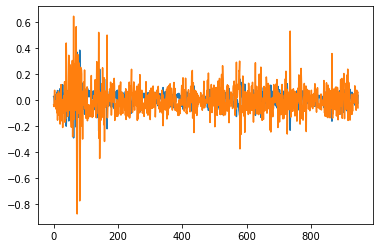

In [ ]:
# plot the factors

p=plt.plot(mkt)
p1 = plt.plot(f)

In [ ]:
# using the poweful package Scikit-Learn to do more analysis

#  Get the variance ratio explained for a given number of components

from sklearn.decomposition import PCA

pca = PCA(n_components = 3)  # Get 3 PCAs;  it can be replaced to up to 5.
X2D = pca.fit_transform(Re) 

PCA1 = pca.components_.T[:,0]   # The first PCA 
print('The first PCA computed alternatively by sklearn \n')
print(PCA1)     # note: result match except sign 
                # which PCA cannot identify and f or -f are the
                 #   same factors in the latent factor framework.  

print('The variance ration explain by each of the PCA \n')
print(pca.explained_variance_ratio_)
                  # the first match what we computed earlier. 

The first PCA computed alternatively by sklearn 

[0.42991216 0.44104642 0.41975514 0.42075042 0.5171347 ]
The variance ration explain by each of the PCA 

[0.8486937  0.06062892 0.04665168]


3
[0.8486937  0.90932263 0.95597431 0.98007759 1.        ]


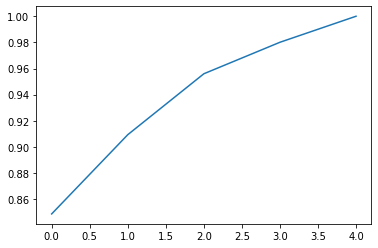

In [ ]:
#  Get the number, d,  of PCA needed to explain 95% of the variance

# Now we get all the PCAs

pca = PCA()
pca.fit(Re)
sumv = np.cumsum(pca.explained_variance_ratio_) 
                # a vector of cumulative sums of the elements  

d = np.argmax(sumv >= 0.95) + 1

print(d)

print(sumv)
plt.plot(sumv)

